# TITANIC PREDICTION

In [1]:
#Data Analysis and wrangling
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import chi2_contingency

#Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

**Data Acquisition**

We start by acquiring the datasets individually and also combine them:

In [2]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
ds=[train,test]

**Analysing data**

- What are the columns available?

In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- View the data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- What are the size of dataset?

In [5]:
train.shape

(891, 12)

- What are the types of variables?

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- What columns have duplicated rows?

In [7]:
train[train.duplicated].count()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

It was not identified duplicated rows.

- What columns have null values?

In [8]:
train.isnull().values.any()

True

In [9]:
#How many columns? 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Analyse of numerical features

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Insights of numerical feature:**
- PassengerId is a unique value that is from 1 to 891
- Survived has 2 values, 1 or 0, it's a target feature
- Although Pclass is classified as a numerical variable, she is categorical because has only three categories (1,2,3).
- Few elderly passengers, the most of them are younger because the distribuition of 75% has passengers with 38 years.
- The most of passengers are alone since 75% of  SibSp and Parch are 1 and 0.

- Analyse of categorical features

In [11]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Insights of categorical feature:**
- Name is a unique value 
- Sex variable has two possibility : male and female with predominant male.
- Embarked take three values with S the top.
- Ticket and Cabine has duplicates values

- Target variable

In [12]:
fa = round(train['Survived'].value_counts(normalize=True)*100)
fa

0    62.0
1    38.0
Name: Survived, dtype: float64

-The percent of people don´t survived is higher.

**Pclass feature**

Univariate analysis - Frequency table

In [13]:
#table
fa = train['Pclass'].value_counts().sort_index()
fr = round(fa/len(train['Pclass'])*100)
tab = pd.DataFrame({
    'Class': fa.index,
    'Absolute Frequency': fa.values,
    'Relative Frequency': fr.values
})
print(tab)

   Class  Absolute Frequency  Relative Frequency
0      1                 216                24.0
1      2                 184                21.0
2      3                 491                55.0


-evaluation: there are more people from class 3 in the ship.

Bivariate - pclass x survived (target)

In [14]:
tab1 = pd.crosstab(train['Pclass'],train['Survived'])
print(tab1)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


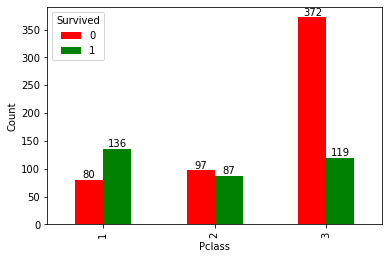

In [15]:
ax = tab1.plot(kind='bar',color=['red', 'green'])
plt.xlabel('Pclass')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [16]:
# Chi-square test
estat, p,lib,_= chi2_contingency(tab1)
# Imprimindo os resultados
print(f"Estatistic: {estat}")
print(f"P: {p}")
print(f"Degrees of freedom: {lib}")

Estatistic: 102.88898875696056
P: 4.549251711298793e-23
Degrees of freedom: 2


evaluation:
- according to the graph, it was possible to observe a very marked disparity in the proportions, which may be an indication of association.
- To evaluate better this association was applied the test of chi-square.
- As the value of was lower than 0.05, extremely low, it can be concluded that there is a significant association between the categorical variables represented.
- Therefore, this feature will be kept.

**Age feature**

Univariate analysis

In [17]:
#Quantity of null values
train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

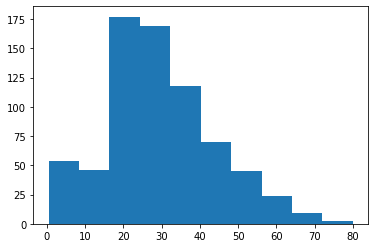

In [18]:
#Histogram
plt.hist(train['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x255880610d0>,
 'caps': [<matplotlib.lines.Line2D at 0x255880617f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2558806dd00>],
 'medians': [<matplotlib.lines.Line2D at 0x25588061f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2558809c310>],
 'means': []}

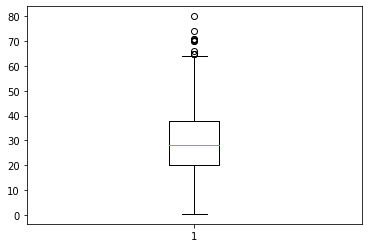

In [28]:
#Boxplot
b1 = [i for i in train['Age'] if not np.isnan(i)]
plt.boxplot(b1)

In [40]:
#Quantity of values > 65
b2 = [i for i in train['Age'] if not np.isnan(i) and i >= 65 ]
len(b2)

11

In [42]:
#Median of age
median_ = train['Age'].median()
median_

28.0

In [43]:
#Mean 
mean_ = train['Age'].mean()
mean_

29.69911764705882

- Null values - The analyse unidimensional of age show that we have a huge number of null values, it's a question that must be solved. As we have a large number of null, the best approach is to replace this values. 
- Histogram -  Look at  distribution on histogram it is noticed  that the most of  passengers are younger. Children represent a small proportion.The distribution might follow a normal curve. 
- Boxplot - It seems we have outliers in the age variable, the number of people with age >65 is only 11. 

ANALYSIS: If will be keep this variable in the study,it is important to replace the null values. One approach to use is change the null values for either median or mean. However, as we have possible outiliers mean can be influenced, so one solution could be change null values for the median.